# VAD Lexicon (Valence-Arousal-Dominance)
- 데이터셋 출처
> https://link.springer.com/article/10.3758/s13428-012-0314-x

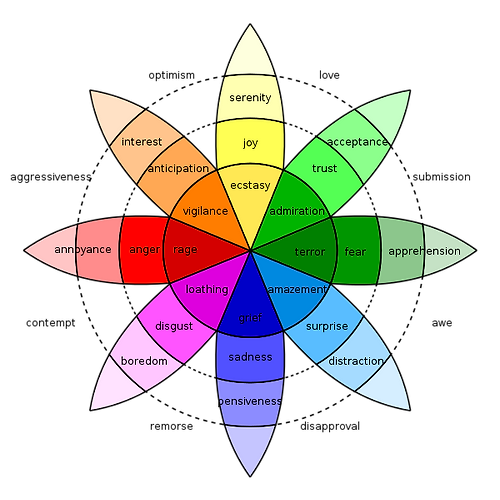

- 8가지 기본 감정 (가장 큰 범주)
1. Joy (기쁨)
2. Trust (신뢰)
3. Fear (공포)
4. Surprise (놀람)
5. Sadness (슬픔)
6. Disgust (혐오)
7. Anger (분노)
8. Anticipation (기대)

- 인사이드 아웃2 감정 
1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. Anxiety (불안이) -> Fear의 외곽에 해당
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

## Exploratory data analysis
- 데이터셋에는 감정외에도 다양한 단어들 존재함. 

In [17]:
# 데이터 로드
df = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\BRM-emot-submit.csv', index_col=0)
df.head(3)

Word  V.Mean.Sum  V.SD.Sum  V.Rat.Sum  A.Mean.Sum  A.SD.Sum  A.Rat.Sum  \
1  aardvark        6.26      2.21         19        2.41      1.40         22   
2   abalone        5.30      1.59         20        2.65      1.90         20   
3   abandon        2.84      1.54         19        3.73      2.43         22   

   D.Mean.Sum  D.SD.Sum  D.Rat.Sum  ...  A.Rat.L  A.Mean.H  A.SD.H  A.Rat.H  \
1        4.27      1.75         15  ...       11      2.55    1.29       11   
2        4.95      1.79         22  ...       12      2.38    1.92        8   
3        3.32      2.50         22  ...       11      3.82    2.14       11   

   D.Mean.L  D.SD.L  D.Rat.L  D.Mean.H  D.SD.H  D.Rat.H  
1      4.12    1.64        8      4.43    1.99        7  
2      5.55    2.21       11      4.36    1.03       11  
3      2.77    2.09       13      4.11    2.93        9  

[3 rows x 64 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13915 entries, 1 to 13915
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Word        13914 non-null  object 
 1   V.Mean.Sum  13915 non-null  float64
 2   V.SD.Sum    13915 non-null  float64
 3   V.Rat.Sum   13915 non-null  int64  
 4   A.Mean.Sum  13915 non-null  float64
 5   A.SD.Sum    13915 non-null  float64
 6   A.Rat.Sum   13915 non-null  int64  
 7   D.Mean.Sum  13915 non-null  float64
 8   D.SD.Sum    13915 non-null  float64
 9   D.Rat.Sum   13915 non-null  int64  
 10  V.Mean.M    13915 non-null  float64
 11  V.SD.M      13915 non-null  float64
 12  V.Rat.M     13915 non-null  int64  
 13  V.Mean.F    13915 non-null  float64
 14  V.SD.F      13915 non-null  float64
 15  V.Rat.F     13915 non-null  int64  
 16  A.Mean.M    13915 non-null  float64
 17  A.SD.M      13915 non-null  float64
 18  A.Rat.M     13915 non-null  int64  
 19  A.Mean.F    13915 non-null  fl

In [ ]:
df.columns

| 컬럼 패턴                                   | 설명                                                               |
|--------------------------------------------|--------------------------------------------------------------------|
| `Word`                                     | 단어(lemma)                                                        |
| `{V,A,D}.Mean.Sum`                         | 전체집단(combined sample)에서의 해당 차원 평균 점수 (1–9 척도)     |
| `{V,A,D}.SD.Sum`                           | 전체집단 해당 차원 평가의 표준편차                                  |
| `{V,A,D}.Rat.Sum`                          | 전체집단 해당 차원에 참여한 평가자(응답자) 수                       |
| `{V,A,D}.Mean.M` / `.SD.M` / `.Rat.M`      | 남성(Male) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수      |
| `{V,A,D}.Mean.F` / `.SD.F` / `.Rat.F`      | 여성(Female) 참가자만 따로 뽑았을 때의 평균·표준편차·평가자 수    |
| `{V,A,D}.Mean.Y` / `.SD.Y` / `.Rat.Y`      | 젊은(Young) 참가자(연령 하위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.O` / `.SD.O` / `.Rat.O`      | 나이든(Old) 참가자(연령 상위 집단)의 평균·표준편차·평가자 수       |
| `{V,A,D}.Mean.L` / `.SD.L` / `.Rat.L`      | 1차 실험(Study 1) 참가자의 평균·표준편차·평가자 수                |
| `{V,A,D}.Mean.H` / `.SD.H` / `.Rat.H`      | 2차 실험(Study 2) 참가자의 평균·표준편차·평가자 수                |

In [19]:
# 전체 집단 V-A-D 평균만 추출
df = df[["Word","V.Mean.Sum","A.Mean.Sum","D.Mean.Sum"]]

# 컬럼명 보기 편하게 변경
df.columns = ["Word","Valence","Arousal","Dominance"]

# df = df.set_index("Word")

In [ ]:
df.head()

In [ ]:
# valence, arousal, dominance 분포 시각화
plt.figure(figsize=(15, 4))

# 1) Valence 분포
plt.subplot(1, 3, 1)
sns.histplot(df['Valence'], kde=True, bins=30, color='skyblue')
plt.title('Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Frequency')

# 2) Arousal 분포
plt.subplot(1, 3, 2)
sns.histplot(df['Arousal'], kde=True, bins=30, color='salmon')
plt.title('Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Frequency')

# 3) Dominance 분포
plt.subplot(1, 3, 3)
sns.histplot(df['Dominance'], kde=True, bins=30, color='lightgreen')
plt.title('Dominance Distribution')
plt.xlabel('Dominance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# 산점도 (감정 좌표계)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='Valence', y='Arousal', data=df, alpha=0.5, ax=axes[0])
axes[0].set_title('Valence vs Arousal')
axes[0].grid(True)

sns.scatterplot(x='Valence', y='Dominance', data=df, alpha=0.5, ax=axes[1])
axes[1].set_title('Valence vs Dominance')
axes[1].grid(True)

sns.scatterplot(x='Arousal', y='Dominance', data=df, alpha=0.5, ax=axes[2])
axes[2].set_title('Arousal vs Dominance')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 상관계수 출력
print(df[['Valence', 'Arousal', 'Dominance']].corr())

In [ ]:
# 히트맵 시각화
sns.heatmap(df[['Valence', 'Arousal', 'Dominance']].corr(), annot=True, cmap='coolwarm')
plt.title('VAD Correlation Heatmap')
plt.show()

In [ ]:
# 3D 산점도
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['Valence']
y = df['Arousal']
z = df['Dominance']

# 색상은 Valence로 설정 (원하면 다른 차원으로 바꿔도 됨)
scatter = ax.scatter(x, y, z, c=x, cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('VAD Emotion Space (3D)')

# 색상 바 (Valence 기준일 때)
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Valence')

plt.tight_layout()
plt.show()

In [ ]:
# 왜도/ 첨도
print("Skewness:")
print(df[['Valence', 'Arousal', 'Dominance']].skew())

print("\nKurtosis:")
print(df[['Valence', 'Arousal', 'Dominance']].kurtosis())

In [ ]:
# 이상치 확인
sns.boxplot(data=df[['Valence', 'Arousal', 'Dominance']])
plt.title('Boxplot of VAD Dimensions')
plt.show()

In [ ]:
# 가장 긍정적/부정적 단어 상위 10개
print("Top Positive Words:")
print(df.sort_values(by='Valence', ascending=False)[['Word', 'Valence']].head(10))

print("\nTop Negative Words:")
print(df.sort_values(by='Valence', ascending=True)[['Word', 'Valence']].head(10))

In [ ]:
# 긍정/부정/중립 분류
# 분류 함수 정의
def classify_valence(v):
    if v > 6.0:
        return "Positive"
    elif v < 4.0:
        return "Negative"
    else:
        return "Neutral"
    
# 새 컬럼으로 분류 결과 저장
df["Valence_Category"] = df["Valence"].apply(classify_valence)

# 시각화
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Valence_Category", order=["Positive", "Neutral", "Negative"], palette="Set2")
plt.title("Valence-based Emotion Polarity Distribution")
plt.xlabel("Valence Category")
plt.ylabel("Number of Words")
plt.tight_layout()
plt.show()

In [ ]:
# 중립인 경우만 필터링해서 리스트 추출
neutral_df = df[df['Valence_Category'] == 'Neutral']

# 필요한 컬럼만 출력
neutral_words = neutral_df[['Word', 'Valence', 'Arousal', 'Dominance']]
print(neutral_words.head()) 

In [ ]:
neutral_df

## 필요한 함수 정의

In [7]:
# 2D Valence-Arousal 각도 기반 
def categorize_emotion_2d(row, labels, center_val=5.0, center_ar=5.0):
    v, a = row.Valence, row.Arousal
    theta = np.degrees(np.arctan2(a - center_ar, v - center_val)) % 360
    sector_size = 360 / len(labels)
    idx = int((theta + sector_size / 2) // sector_size) % len(labels)
    return labels[idx]

In [8]:
# 2D Valence-Arousal 중심만 따로 추출
def extract_va_centroids(centroid_dict_3d):
    return {emotion: [coords[0], coords[1]] for emotion, coords in centroid_dict_3d.items()}

In [9]:
# 2D Valence-Arousal 거리 기반 
def assign_emotion_2d_va(row, centroids_2d):
    v, a = row.Valence, row.Arousal
    target = np.array([v, a])
    min_dist = float('inf')
    best_emotion = None
    for emotion, center in centroids_2d.items():
        dist = np.linalg.norm(target - np.array(center))
        if dist < min_dist:
            min_dist = dist
            best_emotion = emotion
    return best_emotion

In [10]:
# 3D 유클리드 거리 기반 감정 분류 
def assign_emotion_euclidean(row, centroids_3d):
    v, a, d = row.Valence, row.Arousal, row.Dominance
    target = np.array([v, a, d])
    min_dist = float('inf')
    best_emotion = None
    for emotion, center in centroids_3d.items():
        dist = np.linalg.norm(target - np.array(center))
        if dist < min_dist:
            min_dist = dist
            best_emotion = emotion
    return best_emotion

In [11]:
# 3D 코사인 유사도 기반 감정 분류 
def assign_emotion_cosine(row, centroids_3d):
    v, a, d = row.Valence, row.Arousal, row.Dominance
    target_vec = np.array([v, a, d])
    max_similarity = -1
    best_emotion = None
    for emotion, center in centroids_3d.items():
        center_vec = np.array(center)
        cos_sim = dot(target_vec, center_vec) / (norm(target_vec) * norm(center_vec))
        if cos_sim > max_similarity:
            max_similarity = cos_sim
            best_emotion = emotion
    return best_emotion

In [12]:
# 2D 기반 시각화 
def compare_methods(df, methods, labels, titles=None, figsize=(12, 12), alpha=0.8):

    n = len(methods)
    cols = 2
    rows = (n + 1) // cols
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    width = 2*np.pi / len(labels)
    
    fig = plt.figure(figsize=figsize)
    for i, method in enumerate(methods):
        ax = fig.add_subplot(rows, cols, i+1, projection='polar')
        counts = df[method].value_counts().reindex(labels, fill_value=0).values
        ax.bar(angles, counts, width=width, bottom=0.0, alpha=alpha)
        ax.set_xticks(angles)
        ax.set_xticklabels(labels, fontsize=10)
        ax.set_yticklabels([])
        title = titles[i] if titles else method
        ax.set_title(title, va='bottom')
    
    plt.tight_layout()
    plt.show()

In [13]:
# Plutchik 8 기본 감정 전형어 좌표
plutchik_labels = [
    "joy", "trust", "fear", "surprise",
    "sadness", "disgust", "anger", "anticipation"
]

In [20]:
# plutchik_labels의 V.A.D 값 확인
# Word 컬럼에서 해당 단어들만 필터링
vad_representatives = df[df['Word'].isin(plutchik_labels)][['Word', 'Valence', 'Arousal', 'Dominance']]

print(vad_representatives)

               Word  Valence  Arousal  Dominance
418           anger     2.50     5.93       5.14
472    anticipation     5.26     5.39       5.53
3569        disgust     3.32     5.00       4.84
4524           fear     2.93     6.14       3.32
6722            joy     8.21     5.55       7.00
10587       sadness     2.40     2.81       3.84
12138      surprise     7.44     6.57       5.17
12862         trust     7.24     4.30       6.95


In [21]:
# Plutchik 8 감정의 대표 VAD 값 
plutchik_centroids = {
    "joy":         [8.21, 5.55, 7.00],
    "trust":       [7.24, 4.30, 6.95],
    "fear":        [2.93, 6.14, 3.32],
    "surprise":    [7.44, 6.57, 5.17],
    "sadness":     [2.40, 2.81, 3.84],
    "disgust":     [3.32, 5.00, 4.84],
    "anger":       [2.50, 5.93, 5.14],
    "anticipation":[5.26, 5.39, 5.53]
}

In [22]:
# 2D Valence-Arousal 중심만 따로 추출
plutchik_centroids_2d = extract_va_centroids(plutchik_centroids)

In [23]:
# 감정 분류 적용
df["P_2D_Polar"] = df.apply(lambda row: categorize_emotion_2d(row, plutchik_labels), axis=1)
df["P_Euclidean"] = df.apply(lambda row: assign_emotion_euclidean(row, plutchik_centroids), axis=1)
df["P_Cosine"] = df.apply(lambda row: assign_emotion_cosine(row, plutchik_centroids), axis=1)
df["P_2D_Euclidean"] = df.apply(lambda row: assign_emotion_2d_va(row, plutchik_centroids_2d), axis=1)

In [24]:
df.head(3)

Word  Valence  Arousal  Dominance    P_2D_Polar   P_Euclidean P_Cosine  \
1  aardvark     6.26     2.41       4.27  anticipation  anticipation    trust   
2   abalone     5.30     2.65       4.95         anger  anticipation    trust   
3   abandon     2.84     3.73       3.32       disgust       sadness  disgust   

  P_2D_Euclidean  
1          trust  
2          trust  
3        sadness

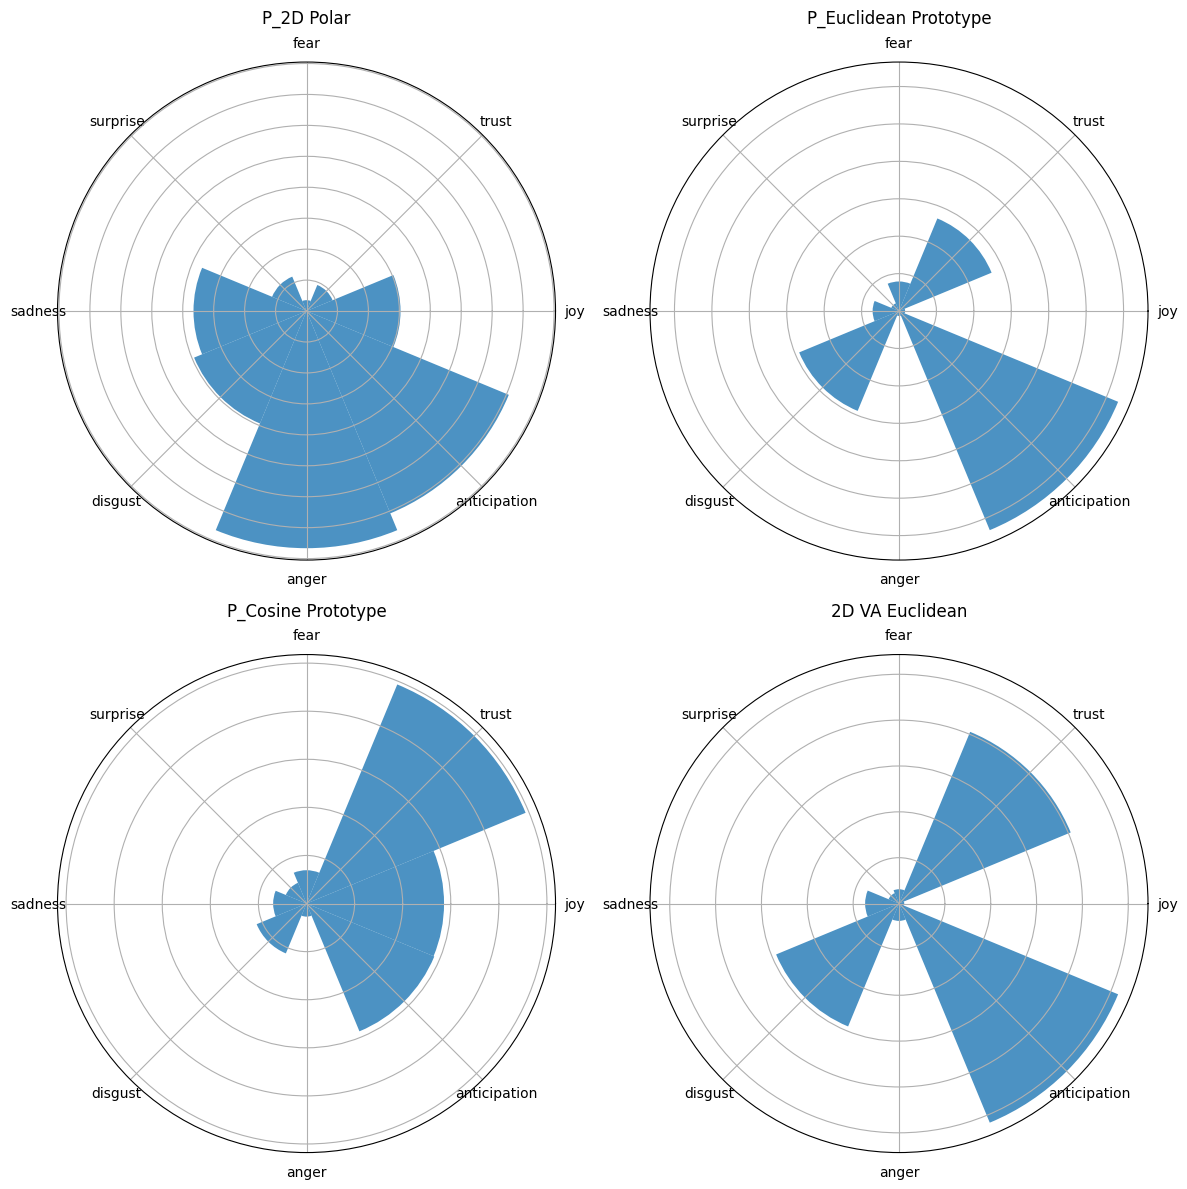

In [25]:
# 4가지 경우 비교 
methods = ['P_2D_Polar', 'P_Euclidean', 'P_Cosine', 'P_2D_Euclidean']
titles  = ['P_2D Polar', 'P_Euclidean Prototype', 'P_Cosine Prototype', '2D VA Euclidean']

compare_methods(df, methods, plutchik_labels, titles)

## 2. 인사이드 아웃 2 기반 (Joy, Sadness, Anger, Disgust, Fear, Anxiety, Envy, Embarrassment, Ennui)

1. Joy (기쁨이)
2. Sadness (슬픔이)
3. Anger (버럭이)
4. Disgust (까칠이)
5. Fear (소심이)
6. **Anxiety (불안이) -> Fear의 외곽에 해당 -> 인사이드 아웃2의 중심 감정** 
7. Envy (부럽이) -> 복합 감정(슬픔+분노) (기본 감정엔 없음)
8. Embarrassment (당황이) -> 복합 감정 (놀람+슬픔)
9. Ennui (따분이) -> Disgust의 외곽에 해당 

------------

In [26]:
# insideout2 의 감정 라벨 정의 
insideout2_labels = [
    "joy", "envy", "fear", "embarrassment",
    "sadness", "disgust", "anger", "anxiety", 'ennui'
]

In [27]:
# insideout2_labels의 V.A.D 값 확인
# Word 컬럼에서 해당 단어들만 필터링
vad_representatives = df[df['Word'].isin(insideout2_labels)][['Word', 'Valence', 'Arousal', 'Dominance']]

print(vad_representatives)

                Word  Valence  Arousal  Dominance
418            anger     2.50     5.93       5.14
484          anxiety     2.38     4.78       3.39
3569         disgust     3.32     5.00       4.84
4031   embarrassment     2.72     5.45       2.92
4129           ennui     4.13     3.26       4.70
4167            envy     3.05     4.35       3.16
4524            fear     2.93     6.14       3.32
6722             joy     8.21     5.55       7.00
10587        sadness     2.40     2.81       3.84


In [28]:
#  insideout2 감정의 VAD 값 
insideout2_centroids = {
    "joy":           [8.21, 5.55, 7.00],
    "anxiety":       [2.38, 4.78, 3.39],
    "fear":          [2.93, 6.14, 3.32],
    "envy":          [3.05, 6.57, 5.17],
    "sadness":       [2.40, 2.81, 3.84],
    "disgust":       [3.32, 5.00, 4.84],
    "anger":         [2.50, 5.93, 5.14],
    "embarrassment": [2.72, 5.45, 2.92],
    'ennui':         [4.13, 3.26, 4.70]
}

In [29]:
# 2D Valence-Arousal 중심만 따로 추출
insideout2_centroids_2d = extract_va_centroids(insideout2_centroids)

In [30]:
'''
# Plutchik ->  InsideOut2 브릿지 재분류 함수
# Plutchik에서 처리해야할 감정: Trust, Anticipation 
# Insideout2에서 처리해야할 감정: Embarrassment, Ennui, Anxiety, Envy

def bridge_to_inside_out2(row):
    label = row.PlutchikEmotion
    v, a, d = row.Valence, row.Arousal, row.Dominance

    # Anticipation은 긍정적 기대감이므로 Joy로 병합
    if label in ("Trust", "Anticipation"):
        return "Joy"

    # Surprise 영역 중 중립~긍정 + 높은 각성 + 낮은 통제감 -> Embarrassment
    if label == 'Surprise' and 4 <= v <= 6 and a > 5 and d < 5:
        return 'Embarrassment'
    
    # Surprise 영역 중 긍정적 반응 (높은 v) -> Envy
    if label == 'Surprise' and v > 6 and a > 5 and d < 5:
        return 'Envy'
    
    # Disgust 영역 중 부정 + 낮은 각성 + 낮은 통제감 -> Ennui
    if label == 'Disgust' and v < 5 and a < 4 and d < 5:
        return 'Ennui'
    
    # Fear 영역 중 각성 높고 통제감 낮으면 Anxiety
    if label == "Fear" and a > 6 and d < 5:
        label = "Anxiety"

    # Anxiety 중에서도 긍정성이 높으면 Envy
    if label == "Anxiety" and v > 6:
        label = "Envy"
    # 나머지는 원래 Plutchik 라벨 그대로
    return label
'''

'\n# Plutchik ->  InsideOut2 브릿지 재분류 함수\n# Plutchik에서 처리해야할 감정: Trust, Anticipation \n# Insideout2에서 처리해야할 감정: Embarrassment, Ennui, Anxiety, Envy\n\ndef bridge_to_inside_out2(row):\n    label = row.PlutchikEmotion\n    v, a, d = row.Valence, row.Arousal, row.Dominance\n\n    # Anticipation은 긍정적 기대감이므로 Joy로 병합\n    if label in ("Trust", "Anticipation"):\n        return "Joy"\n\n    # Surprise 영역 중 중립~긍정 + 높은 각성 + 낮은 통제감 -> Embarrassment\n    if label == \'Surprise\' and 4 <= v <= 6 and a > 5 and d < 5:\n        return \'Embarrassment\'\n    \n    # Surprise 영역 중 긍정적 반응 (높은 v) -> Envy\n    if label == \'Surprise\' and v > 6 and a > 5 and d < 5:\n        return \'Envy\'\n    \n    # Disgust 영역 중 부정 + 낮은 각성 + 낮은 통제감 -> Ennui\n    if label == \'Disgust\' and v < 5 and a < 4 and d < 5:\n        return \'Ennui\'\n    \n    # Fear 영역 중 각성 높고 통제감 낮으면 Anxiety\n    if label == "Fear" and a > 6 and d < 5:\n        label = "Anxiety"\n\n    # Anxiety 중에서도 긍정성이 높으면 Envy\n    if label == "Anxiety" an

In [31]:
# 분류 적용
df["IO2_2D_Polar"] = df.apply(lambda row: categorize_emotion_2d(row, insideout2_labels), axis=1)
df["IO2_Euclidean"] = df.apply(lambda row: assign_emotion_euclidean(row, insideout2_centroids), axis=1)
df["IO2_Cosine"] = df.apply(lambda row: assign_emotion_cosine(row, insideout2_centroids), axis=1)
df["IO2_2D_Euclidean"] = df.apply(lambda row: assign_emotion_2d_va(row, insideout2_centroids_2d), axis=1)

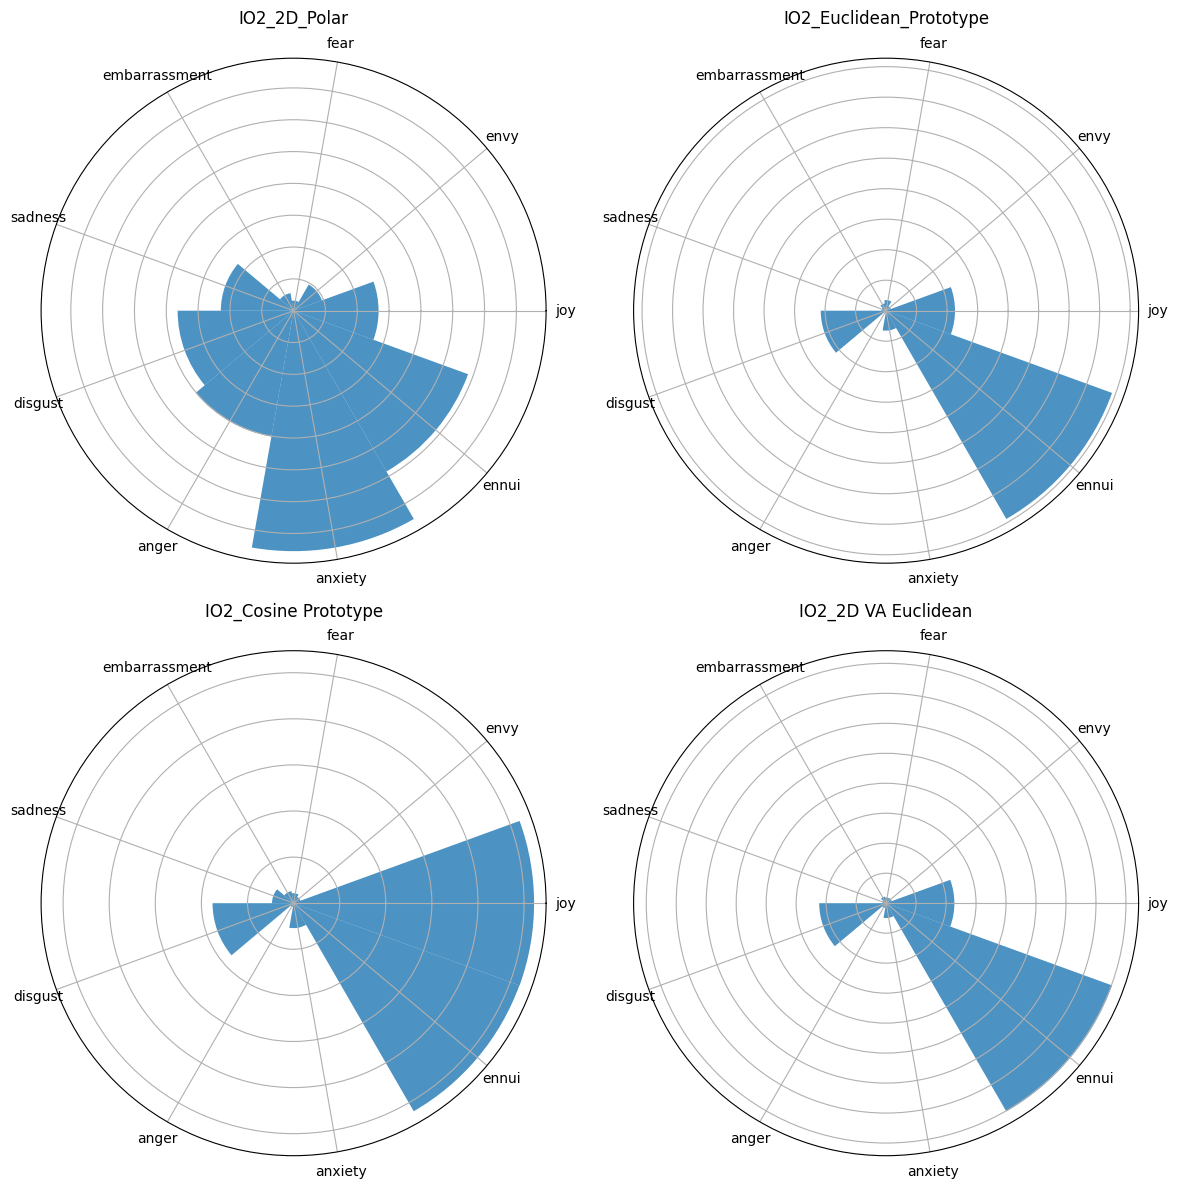

In [32]:
# 4가지 경우 비교 
methods = ['IO2_2D_Polar', 'IO2_Euclidean', 'IO2_Cosine', 'IO2_2D_Euclidean']
titles  = ['IO2_2D_Polar', 'IO2_Euclidean_Prototype', 'IO2_Cosine Prototype', 'IO2_2D VA Euclidean']

compare_methods(df, methods, insideout2_labels, titles)

In [33]:
df.head()

Word  Valence  Arousal  Dominance    P_2D_Polar   P_Euclidean  \
1     aardvark     6.26     2.41       4.27  anticipation  anticipation   
2      abalone     5.30     2.65       4.95         anger  anticipation   
3      abandon     2.84     3.73       3.32       disgust       sadness   
4  abandonment     2.63     4.95       2.64       sadness          fear   
5        abbey     5.85     2.20       5.00         anger         trust   

  P_Cosine P_2D_Euclidean IO2_2D_Polar  IO2_Euclidean     IO2_Cosine  \
1    trust          trust      anxiety          ennui            joy   
2    trust          trust      anxiety          ennui            joy   
3  disgust        sadness      disgust        sadness        disgust   
4     fear        disgust      disgust  embarrassment  embarrassment   
5    trust          trust      anxiety          ennui            joy   

  IO2_2D_Euclidean  
1            ennui  
2            ennui  
3          sadness  
4          anxiety  
5            ennui

### 2.1 유의어 확인

#### 2.2.1 라이브러리 및 데이터 로드

In [81]:
import nltk 
from nltk.corpus import wordnet
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wooll\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# 데이터 로드
vad = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\vad_lexicon_labeled.csv')

#### 2.1.2 필요한 함수 

In [52]:
# 주어진 단어의 모든 유의어를 WordNet에서 찾아 반환하는 함수
def get_synonyms(word):
  synonyms = set() # 중복 제거를 위해 set 사용
  for syn in wordnet.synsets(word):
    for lemma in syn.lemmas():
      synonyms.add(lemma.name().replace('_', ' ')) # '_"는 공백으로 변경
  return sorted(list(synonyms)) # 알파벳순으로 정렬하여 리스트로 반환

In [58]:
# 단어의 유의어 목록을 출력하는 함수 
def process_and_print_emotion_synonyms(emotion_list):
    print("--- 각 감정 단어의 유의어 목록 ---")
    print("-" * 30)

    # 이 함수 내부에서 사용할 임시 딕셔너리
    # 결과를 반환하지 않고 바로 출력하는 용도
    _temp_grouped_synonyms = {}

    for word in emotion_list:
        # WordNet은 소문자 단어에 더 많은 정보를 가지고 있어 소문자로 변환합니다.
        syns = get_synonyms(word.lower())
        _temp_grouped_synonyms[word] = syns # 임시 저장 (출력용)

        print(f"**{word}**:")
        if syns:
            print(f"  {', '.join(syns)}")
        else:
            print("  유의어를 찾을 수 없습니다.")
        print("-" * 30)

    print("\n--- 전체 유의어 그룹 요약 ---")
    for emotion, syns in _temp_grouped_synonyms.items():
        print(f"**{emotion}**: {len(syns)}개 유의어")

In [59]:
def build_synonym_dict(emotion_list):
    synonym_dict = {}
    for emotion in emotion_list:
        synonyms = get_synonyms(emotion.lower())
        synonym_dict[emotion] = synonyms
    return synonym_dict

In [70]:
# 라벨 자체의 vad 값과 해당 라벨의 유의어 리스트의 vad 평균값을 비교하는 함수 
def compare_label_synonym_vad(vad, synonym_dict, emotion_centroids):
    results = []

    # Word 소문자로 통일
    vad = vad.copy()
    vad['Word'] = vad['Word'].str.lower()
    word_map = vad.set_index('Word')[['Valence', 'Arousal', 'Dominance']]

    for emotion, synonyms in synonym_dict.items():
        synonyms = [w.lower() for w in synonyms]
        # 유효한 유의어만 필터링
        valid_syns = [s for s in synonyms if s in word_map.index]

        if not valid_syns:
            continue

        syn_vads = word_map.loc[valid_syns]
        mean_vad = syn_vads.mean().values
        label_vad = np.array(emotion_centroids.get(emotion, [np.nan, np.nan, np.nan]))
        diff = mean_vad - label_vad

        results.append({
            'Emotion': emotion,
            'Label_VAD': label_vad,
            'Synonym_Mean_VAD': mean_vad,
            'Difference': diff,
            'Synonym_Count': len(valid_syns),
            'Valid_Synonyms': ', '.join(valid_syns)
        })

    return pd.DataFrame(results)

In [82]:
# 각 감정별 라벨 vs 유의어 평균의 3D 산점도 시각화 함수
def plot_vad_comparison_3d(result_df, title='VAD Comparison: Label vs. Synonyms'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for _, row in result_df.iterrows():
        emotion = row['Emotion']
        label_vad = row['Label_VAD']
        mean_vad = row['Synonym_Mean_VAD']

        # 점 찍기
        ax.scatter(*label_vad, color='blue', label='Label' if _ == 0 else "", marker='o')
        ax.scatter(*mean_vad, color='red', label='Synonym Avg' if _ == 0 else "", marker='^')

        # 연결선
        ax.plot([label_vad[0], mean_vad[0]],
                [label_vad[1], mean_vad[1]],
                [label_vad[2], mean_vad[2]],
                color='gray', linestyle='dotted')

        # 라벨 텍스트
        ax.text(*label_vad, emotion, fontsize=10)

    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_zlabel('Dominance')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [83]:
# 각 감정별 vad 차이 막대그래프
def plot_vad_difference_bar(result_df, title='VAD Difference per Emotion'):
    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    for i, dim in enumerate(['Valence', 'Arousal', 'Dominance']):
        values = [diff[i] for diff in result_df['Difference']]
        axes[i].bar(result_df['Emotion'], values, color='skyblue')
        axes[i].axhline(0, color='gray', linestyle='--')
        axes[i].set_ylabel(f'{dim} Δ')
        axes[i].set_title(f'{dim} Difference (Synonym Avg - Label)')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

#### 2.1.3 Plutchik 기반

In [56]:
# Plutchik 8 기본 감정 전형어
plutchik_labels = [
    "joy", "trust", "fear", "surprise",
    "sadness", "disgust", "anger", "anticipation"
]

In [71]:
# Plutchik 라벨 기반 유의어 사전
plutchik_synonym_dict = build_synonym_dict(plutchik_labels)

In [72]:
process_and_print_emotion_synonyms(plutchik_labels)

--- 각 감정 단어의 유의어 목록 ---
------------------------------
**joy**:
  delight, gladden, joy, joyfulness, joyousness, pleasure, rejoice
------------------------------
**trust**:
  bank, believe, cartel, combine, commit, confide, confidence, corporate trust, desire, entrust, faith, hope, intrust, reliance, rely, swear, trust, trustfulness, trustingness
------------------------------
**fear**:
  awe, care, concern, dread, fear, fearfulness, fright, revere, reverence, venerate, veneration
------------------------------
**surprise**:
  storm, surprisal, surprise
------------------------------
**sadness**:
  gloominess, lugubriousness, sadness, sorrow, sorrowfulness, unhappiness
------------------------------
**disgust**:
  churn up, disgust, gross out, nauseate, repel, revolt, sicken
------------------------------
**anger**:
  anger, angriness, choler, ira, ire, see red, wrath
------------------------------
**anticipation**:
  anticipation, expectancy, expectation, prediction, prevision
-------

In [73]:
plutchik_synonym_analysis = compare_label_synonym_vad(
    vad=vad,
    synonym_dict=plutchik_synonym_dict,
    emotion_centroids=plutchik_centroids
)

In [74]:
display(plutchik_synonym_analysis)

Emotion           Label_VAD  \
0           joy   [8.21, 5.55, 7.0]   
1         trust   [7.24, 4.3, 6.95]   
2          fear  [2.93, 6.14, 3.32]   
3      surprise  [7.44, 6.57, 5.17]   
4       sadness   [2.4, 2.81, 3.84]   
5       disgust   [3.32, 5.0, 4.84]   
6         anger   [2.5, 5.93, 5.14]   
7  anticipation  [5.26, 5.39, 5.53]   

                                    Synonym_Mean_VAD  \
0                [7.840000000000001, 5.7325, 7.2875]   
1  [6.006428571428571, 4.0807142857142855, 5.8292...   
2  [4.977142857142857, 4.298571428571429, 4.84714...   
3                               [6.59, 6.215, 4.445]   
4       [2.413333333333333, 3.59, 3.533333333333333]   
5  [3.6633333333333336, 4.596666666666667, 4.8533...   
6     [2.8449999999999998, 5.9399999999999995, 4.75]   
7     [5.825, 4.959999999999999, 5.3725000000000005]   

                                          Difference  Synonym_Count  \
0  [-0.3700000000000001, 0.1825000000000001, 0.28...              4   
1  [-1.2335714285714294, -0.2192857142857143, -1....             14   
2  [2.0471428571428567, -1.8414285714285707, 1.52...              7   
3  [-0.8500000000000005, -0.3550000000000004, -0....              2   
4  [0.013333333333333197, 0.7799999999999998, -0....              3   
5  [0.3433333333333337, -0.4033333333333333, 0.01...              3   
6  [0.34499999999999975, 0.009999999999999787, -0...              2   
7  [0.5650000000000004, -0.4300000000000006, -0.1...              4   

                                      Valid_Synonyms  
0                    delight, joy, pleasure, rejoice  
1  bank, believe, cartel, combine, commit, confid...  
2  awe, care, concern, dread, fear, fright, rever...  
3                                    storm, surprise  
4                       sadness, sorrow, unhappiness  
5                             disgust, repel, revolt  
6                                       anger, wrath  
7  anticipation, expectancy, expectation, prediction

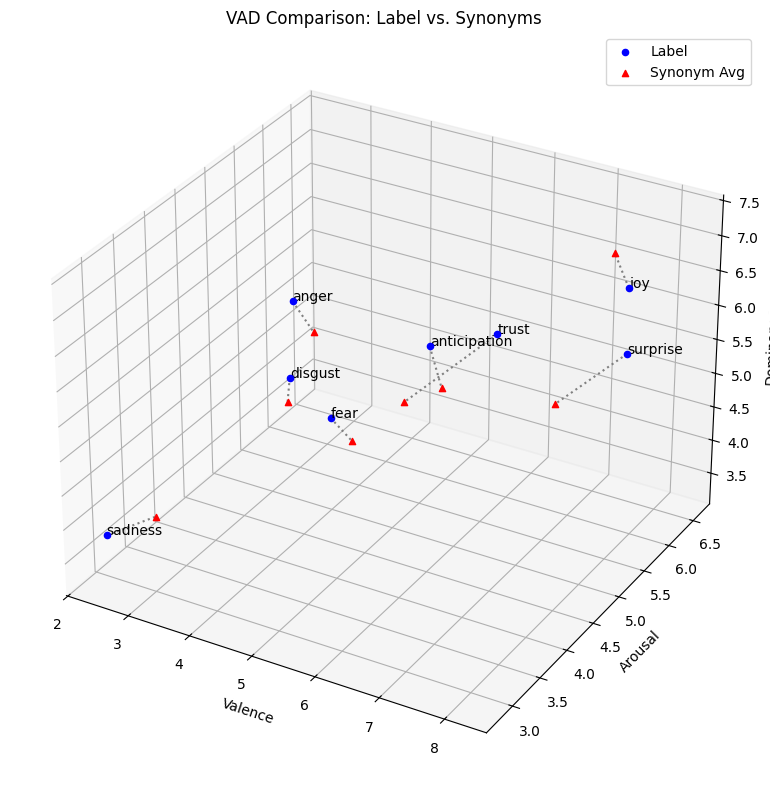

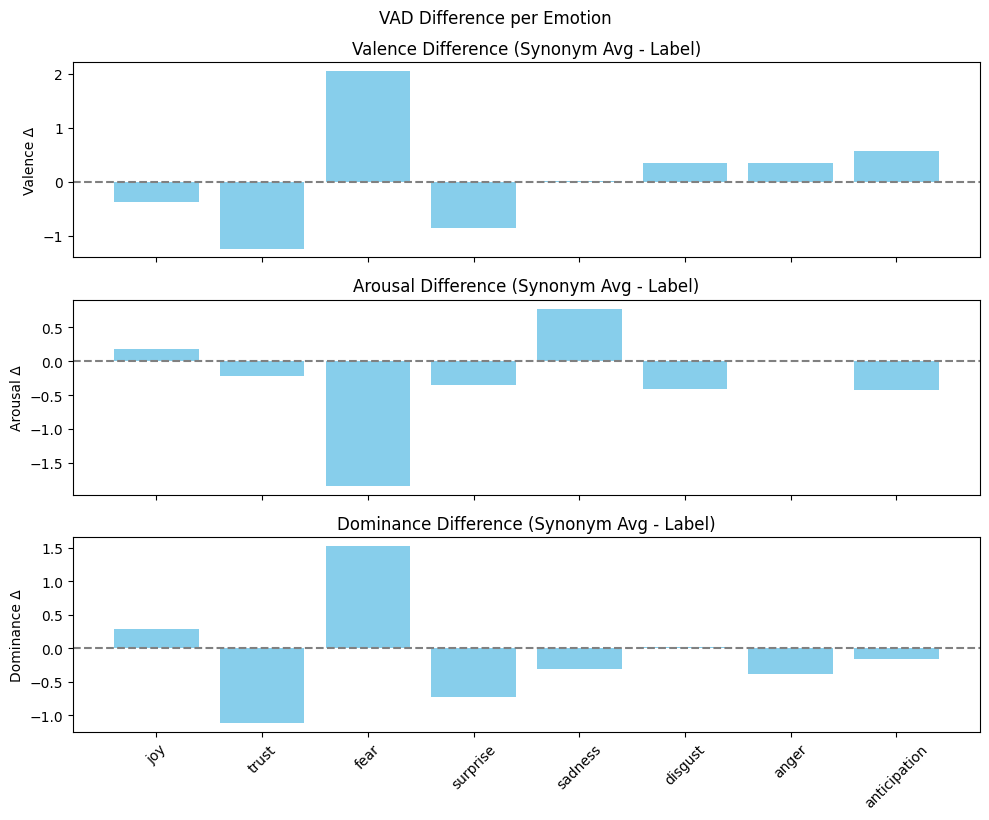

In [84]:
# 비교 결과 DataFrame 생성
result_df = compare_label_synonym_vad(vad, plutchik_synonym_dict, plutchik_centroids)

# 3D 시각화
plot_vad_comparison_3d(result_df)

# 차이값 시각화
plot_vad_difference_bar(result_df)

#### 2.1.4 InsideOut2 기반

In [75]:
# insideout2 의 감정 라벨 정의 
insideout2_labels = [
    "joy", "envy", "fear", "embarrassment",
    "sadness", "disgust", "anger", "anxiety", 'ennui'
]

In [76]:
process_and_print_emotion_synonyms(insideout2_labels)

--- 각 감정 단어의 유의어 목록 ---
------------------------------
**joy**:
  delight, gladden, joy, joyfulness, joyousness, pleasure, rejoice
------------------------------
**envy**:
  begrudge, enviousness, envy, invidia
------------------------------
**fear**:
  awe, care, concern, dread, fear, fearfulness, fright, revere, reverence, venerate, veneration
------------------------------
**embarrassment**:
  embarrassment, overplus, plethora, superfluity
------------------------------
**sadness**:
  gloominess, lugubriousness, sadness, sorrow, sorrowfulness, unhappiness
------------------------------
**disgust**:
  churn up, disgust, gross out, nauseate, repel, revolt, sicken
------------------------------
**anger**:
  anger, angriness, choler, ira, ire, see red, wrath
------------------------------
**anxiety**:
  anxiety, anxiousness
------------------------------
**ennui**:
  boredom, ennui, tedium
------------------------------

--- 전체 유의어 그룹 요약 ---
**joy**: 7개 유의어
**envy**: 4개 유의어
**fear**: 11

In [77]:
# InsideOut2 라벨 기반 유의어 사전
insideout2_synonym_dict = build_synonym_dict(insideout2_labels)

In [78]:
# InsideOut2 기준 분석
insideout2_synonym_analysis = compare_label_synonym_vad(
    vad=vad,
    synonym_dict=insideout2_synonym_dict,
    emotion_centroids=insideout2_centroids
)

In [79]:
display(insideout2_synonym_analysis)

Emotion           Label_VAD  \
0            joy   [8.21, 5.55, 7.0]   
1           envy  [3.05, 6.57, 5.17]   
2           fear  [2.93, 6.14, 3.32]   
3  embarrassment  [2.72, 5.45, 2.92]   
4        sadness   [2.4, 2.81, 3.84]   
5        disgust   [3.32, 5.0, 4.84]   
6          anger   [2.5, 5.93, 5.14]   
7        anxiety  [2.38, 4.78, 3.39]   
8          ennui   [4.13, 3.26, 4.7]   

                                    Synonym_Mean_VAD  \
0                [7.840000000000001, 5.7325, 7.2875]   
1                                 [3.5, 4.41, 4.245]   
2  [4.977142857142857, 4.298571428571429, 4.84714...   
3                                 [2.72, 5.45, 2.92]   
4       [2.413333333333333, 3.59, 3.533333333333333]   
5  [3.6633333333333336, 4.596666666666667, 4.8533...   
6     [2.8449999999999998, 5.9399999999999995, 4.75]   
7                                 [2.38, 4.78, 3.39]   
8                                 [3.45, 2.92, 4.87]   

                                          Difference  Synonym_Count  \
0  [-0.3700000000000001, 0.1825000000000001, 0.28...              4   
1   [0.4500000000000002, -2.16, -0.9249999999999998]              2   
2  [2.0471428571428567, -1.8414285714285707, 1.52...              7   
3                                    [0.0, 0.0, 0.0]              1   
4  [0.013333333333333197, 0.7799999999999998, -0....              3   
5  [0.3433333333333337, -0.4033333333333333, 0.01...              3   
6  [0.34499999999999975, 0.009999999999999787, -0...              2   
7                                    [0.0, 0.0, 0.0]              1   
8  [-0.6799999999999997, -0.33999999999999986, 0....              2   

                                      Valid_Synonyms  
0                    delight, joy, pleasure, rejoice  
1                                     begrudge, envy  
2  awe, care, concern, dread, fear, fright, rever...  
3                                      embarrassment  
4                       sadness, sorrow, unhappiness  
5                             disgust, repel, revolt  
6                                       anger, wrath  
7                                            anxiety  
8                                     boredom, ennui

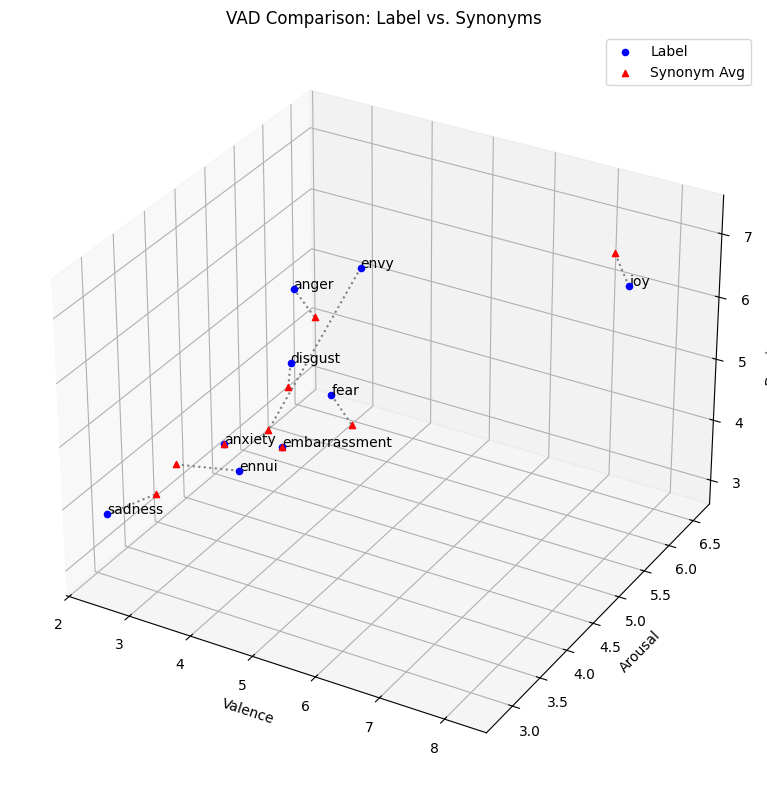

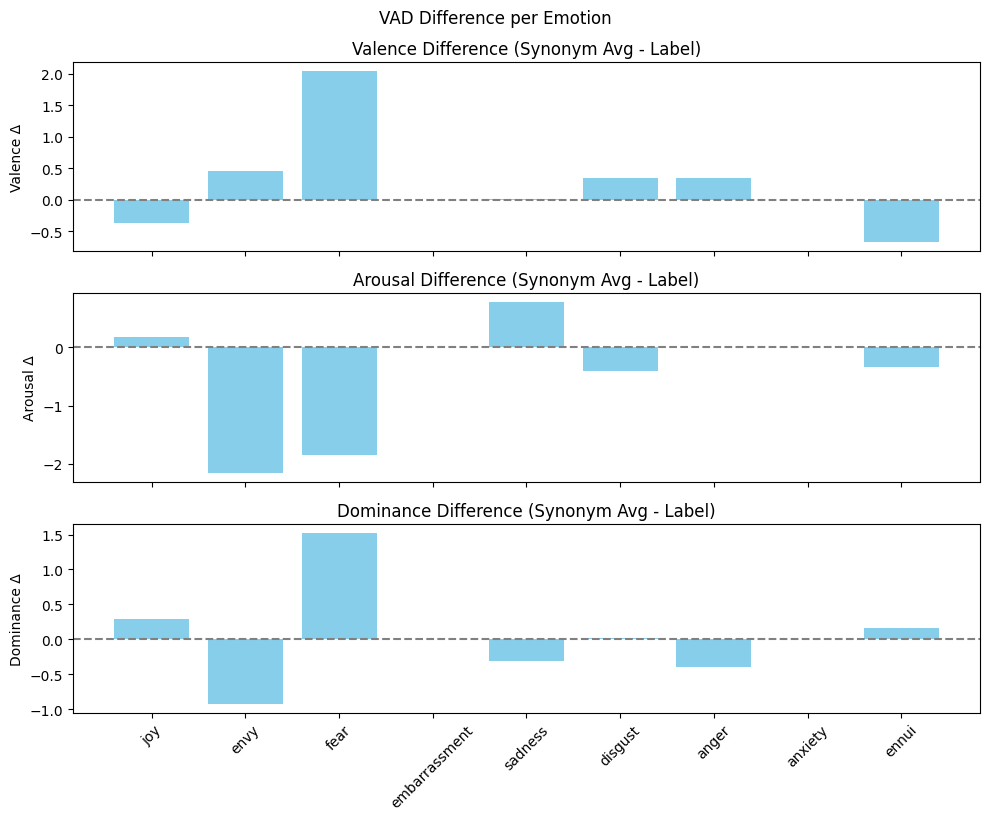

In [85]:
# 비교 결과 DataFrame 생성
result_df = compare_label_synonym_vad(vad, insideout2_synonym_dict, insideout2_centroids)

# 3D 시각화
plot_vad_comparison_3d(result_df)

# 차이값 시각화
plot_vad_difference_bar(result_df)

### 2.2 

## 3. 저장

In [34]:
df_labeled = df.copy()
df_labeled.to_csv('vad_lexicon_labeled.csv', index=False)

## 4. go-emotion dataset으로 확인해보기
- vad 사전에는 감정 외 단어들도 많으므로 감정 단어들만 들어있는 데이터셋으로 확인

In [35]:
vad = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\vad_lexicon_labeled.csv')

In [36]:
go_emo = pd.read_csv(r'C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\go_emotions_dataset.csv')
go_emo

id                                               text  \
0       eew5j0j                                    That game hurt.   
1       eemcysk   >sexuality shouldn’t be a grouping category I...   
2       ed2mah1     You do right, if you don't care then fuck 'em!   
3       eeibobj                                 Man I love reddit.   
4       eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
...         ...                                                ...   
211220  ee6pagw                             Everyone likes [NAME].   
211221  ef28nod  Well when you’ve imported about a gazillion of...   
211222  ee8hse1                                 That looks amazing   
211223  edrhoxh  The FDA has plenty to criticize. But like here...   
211224  edze9g4  Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...   

        example_very_unclear  admiration  amusement  anger  annoyance  \
0                      False           0          0      0          0   
1                       True           0          0      0          0   
2                      False           0          0      0          0   
3                      False           0          0      0          0   
4                      False           0          0      0          0   
...                      ...         ...        ...    ...        ...   
211220                 False           0          0      0          0   
211221                 False           0          0      0          0   
211222                 False           1          0      0          0   
211223                 False           0          0      1          0   
211224                  True           0          0      0          0   

        approval  caring  confusion  ...  love  nervousness  optimism  pride  \
0              0       0          0  ...     0            0         0      0   
1              0       0          0  ...     0            0         0      0   
2              0       0          0  ...     0            0         0      0   
3              0       0          0  ...     1            0         0      0   
4              0       0          0  ...     0            0         0      0   
...          ...     ...        ...  ...   ...          ...       ...    ...   
211220         0       0          0  ...     1            0         0      0   
211221         0       1          0  ...     0            0         0      0   
211222         0       0          0  ...     0            0         0      0   
211223         0       0          0  ...     0            0         0      0   
211224         0       0          0  ...     0            0         0      0   

        realization  relief  remorse  sadness  surprise  neutral  
0                 0       0        0        1         0        0  
1                 0       0        0        0         0        0  
2                 0       0        0        0         0        1  
3                 0       0        0        0         0        0  
4                 0       0        0        0         0        1  
...             ...     ...      ...      ...       ...      ...  
211220            0       0        0        0         0        0  
211221            0       0        0        0         0        0  
211222            0       0        0        0         0        0  
211223            0       0        0        0         0        0  
211224            0       0        0        0         0        0  

[211225 rows x 31 columns]

In [37]:
emotions = set(go_emo.columns[3:])
emotions

{'admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'neutral',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise'}

In [38]:
# vad 사전에서 위의 감정들이 가지는 값 확인
# 확인할 단어 리스트 (소문자)
words = {
    'admiration','amusement','anger','annoyance','approval','caring','confusion',
    'curiosity','desire','disappointment','disapproval','disgust','embarrassment',
    'excitement','fear','gratitude','grief','joy','love','nervousness','neutral',
    'optimism','pride','realization','relief','remorse','sadness','surprise'
}

# 소문자로 통일 후 필터링
vad['Word'] = vad['Word'].str.lower()
filtered = vad[vad['Word'].isin(words)].copy()

# V-A-D 값만 출력
print(filtered)

                 Word  Valence  Arousal  Dominance    P_2D_Polar  \
151        admiration     7.58     5.52       6.11           joy   
386         amusement     7.00     4.82       6.59           joy   
417             anger     2.50     5.93       5.14       sadness   
441         annoyance     2.95     4.10       3.45       disgust   
540          approval     6.75     3.52       6.63  anticipation   
2551        confusion     3.32     4.64       3.08       sadness   
3007        curiosity     6.37     5.90       6.21         trust   
3340           desire     7.05     6.20       6.07         trust   
3515   disappointment     2.79     4.90       4.08       sadness   
3516      disapproval     3.40     4.23       5.26       disgust   
3568          disgust     3.32     5.00       4.84       sadness   
4030    embarrassment     2.72     5.45       2.92       sadness   
4292       excitement     7.62     6.21       6.33         trust   
4523             fear     2.93     6.14       3.

In [39]:
filtered["P_2D_Polar"] = filtered.apply(lambda row: categorize_emotion_2d(row, plutchik_labels), axis=1)
filtered["P_Euclidean"] = filtered.apply(lambda row: assign_emotion_euclidean(row, plutchik_centroids), axis=1)
filtered["P_Cosine"] = filtered.apply(lambda row: assign_emotion_cosine(row, plutchik_centroids), axis=1)
filtered["P_2D_Euclidean"] = filtered.apply(lambda row: assign_emotion_2d_va(row, plutchik_centroids_2d), axis=1)

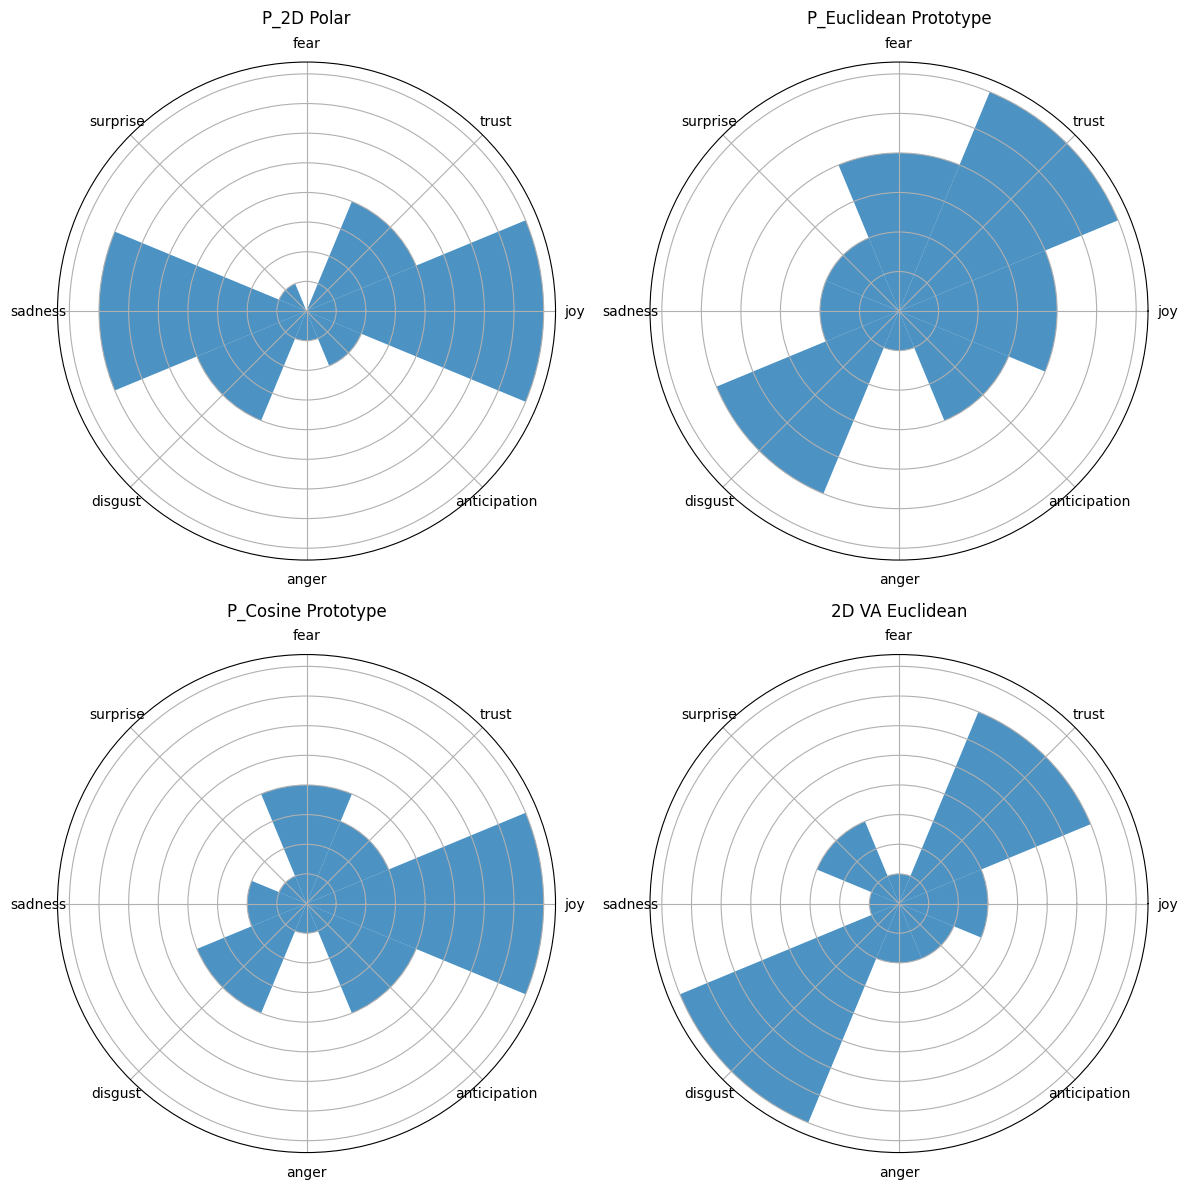

In [40]:
# 4가지 경우 비교 
methods = ['P_2D_Polar', 'P_Euclidean', 'P_Cosine', 'P_2D_Euclidean']
titles  = ['P_2D Polar', 'P_Euclidean Prototype', 'P_Cosine Prototype', '2D VA Euclidean']

compare_methods(filtered, methods, plutchik_labels, titles)

In [41]:
filtered["IO2_2D_Polar"] = filtered.apply(lambda row: categorize_emotion_2d(row, insideout2_labels), axis=1)
filtered["IO2_Euclidean"] = filtered.apply(lambda row: assign_emotion_euclidean(row, insideout2_centroids), axis=1)
filtered["IO2_Cosine"] = filtered.apply(lambda row: assign_emotion_cosine(row, insideout2_centroids), axis=1)
filtered["IO2_2D_Euclidean"] = filtered.apply(lambda row: assign_emotion_2d_va(row, insideout2_centroids_2d), axis=1)

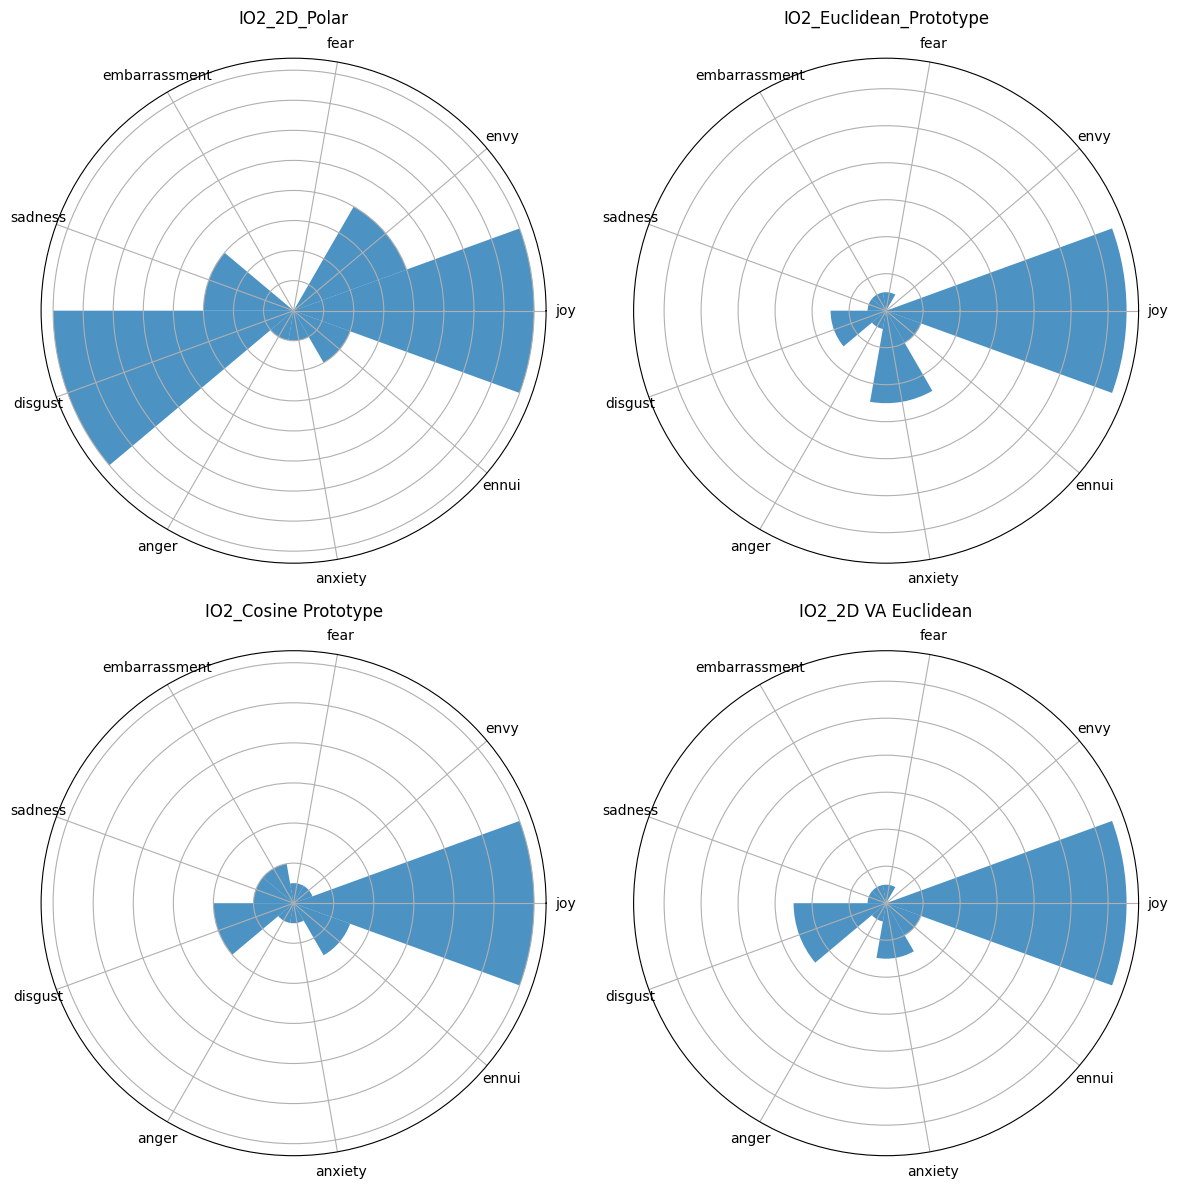

In [42]:
# 4가지 경우 비교 
methods = ['IO2_2D_Polar', 'IO2_Euclidean', 'IO2_Cosine', 'IO2_2D_Euclidean']
titles  = ['IO2_2D_Polar', 'IO2_Euclidean_Prototype', 'IO2_Cosine Prototype', 'IO2_2D VA Euclidean']

compare_methods(filtered, methods, insideout2_labels, titles)

## 6. 한글 사전 버전으로 만들기

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
import time
import re

In [ ]:
translator = Translator()

In [ ]:
print(translator.translate("activity", src="en", dest="ko").text)

In [ ]:
def translate_korean(text):
    try:
        time.sleep(0.5)  # 너무 빠른 요청 방지
        return translator.translate(text, src='en', dest='ko').text
    except Exception as e:
        print(f"'{text}' 번역 실패: {e}")
        return text  # 실패 시 원래 텍스트 유지

In [ ]:
df_ko = vad.copy()
df_ko['Word'] = vad['Word'].apply(translate_korean)

In [ ]:
# 확인
df_ko.head()

In [ ]:
untranslated_df = df_ko[df_ko['Word'].apply(lambda x: bool(re.search(r'[a-zA-Z]', x)))]
print(untranslated_df[['Word', 'Valence', 'Arousal', 'Dominance']].head(20))
print(f"총 {len(untranslated_df)}개 단어가 번역되지 않았습니다.")

In [ ]:
untranslated_words = untranslated_df['Word'].tolist()
translated_map_retry = {}

In [ ]:
# 번역 재시도 
for word in untranslated_words:
    try:
        time.sleep(1)  # 요청 제한 우회
        translated = translator.translate(word, src='en', dest='ko').text
        translated_map_retry[word] = translated
    except Exception as e:
        print(f"❌ 번역 실패: {word} → {e}")
        translated_map_retry[word] = word  # 실패 시 원래 단어 유지

In [ ]:
# 번역 결과와 원래 단어가 같은 경우 → 실패로 간주
failed_words = [word for word, result in translated_map_retry.items() if word == result]

print(f"\n❌ 총 {len(failed_words)}개 단어가 번역되지 않았습니다.")
print(failed_words[:20])  # 앞에서 20개만 예시 출력

In [ ]:
# 수동 번역
pd.DataFrame(failed_words, columns=["Word"]).to_csv("번역_실패_리스트.csv", index=False)

In [30]:
# 번역된 단어 목록 불러오기
translated_map_df = pd.read_csv(r"C:\Users\wooll\OneDrive\문서\GitHub\-\dataset\번역_실패_리스트_완료본.csv")
translated_map = dict(zip(translated_map_df["영문단어"], translated_map_df["한글번역"]))

In [31]:
df_ko['Word'] = df_ko['Word'].replace(translated_map)

In [35]:
vad.head(10)

Word  Valence  Arousal  Dominance    P_2D_Polar   P_Euclidean  \
0     aardvark     6.26     2.41       4.27  anticipation  anticipation   
1      abalone     5.30     2.65       4.95         anger  anticipation   
2      abandon     2.84     3.73       3.32       disgust       sadness   
3  abandonment     2.63     4.95       2.64       sadness          fear   
4        abbey     5.85     2.20       5.00         anger         trust   
5      abdomen     5.43     3.68       5.15         anger  anticipation   
6    abdominal     4.48     3.50       5.32         anger       disgust   
7       abduct     2.42     5.90       2.75       sadness          fear   
8    abduction     2.05     5.33       3.02       sadness          fear   
9        abide     5.52     3.26       5.33         anger  anticipation   

  P_Cosine P_2D_Euclidean IO2_2D_Polar  IO2_Euclidean     IO2_Cosine  \
0    trust          trust      anxiety          ennui            joy   
1    trust          trust      anxiety          ennui            joy   
2  disgust        sadness      disgust        sadness        disgust   
3     fear        disgust      disgust  embarrassment  embarrassment   
4    trust          trust      anxiety          ennui            joy   
5      joy   anticipation      anxiety          ennui            joy   
6    trust        disgust        anger          ennui          ennui   
7     fear          anger      sadness  embarrassment           fear   
8     fear          anger      sadness  embarrassment           fear   
9    trust          trust      anxiety          ennui            joy   

  IO2_2D_Euclidean Valence_Category  
0            ennui         Positive  
1            ennui          Neutral  
2          sadness         Negative  
3          anxiety         Negative  
4            ennui          Neutral  
5            ennui          Neutral  
6            ennui          Neutral  
7            anger         Negative  
8          anxiety         Negative  
9            ennui          Neutral

In [33]:
# 제대로 적용되었는지 샘플 확인
print(df_ko.head(10))

   Word  Valence  Arousal  Dominance    P_2D_Polar   P_Euclidean P_Cosine  \
0  개미핥기     6.26     2.41       4.27  anticipation  anticipation    trust   
1    전복     5.30     2.65       4.95         anger  anticipation    trust   
2   버리다     2.84     3.73       3.32       disgust       sadness  disgust   
3    포기     2.63     4.95       2.64       sadness          fear     fear   
4   대사원     5.85     2.20       5.00         anger         trust    trust   
5    복부     5.43     3.68       5.15         anger  anticipation      joy   
6    복부     4.48     3.50       5.32         anger       disgust    trust   
7    납치     2.42     5.90       2.75       sadness          fear     fear   
8   외 전     2.05     5.33       3.02       sadness          fear     fear   
9   머물다     5.52     3.26       5.33         anger  anticipation    trust   

  P_2D_Euclidean IO2_2D_Polar  IO2_Euclidean     IO2_Cosine IO2_2D_Euclidean  \
0          trust      anxiety          ennui            joy            e

In [38]:
# 중복된 전체 행 확인
duplicates = df_ko[df_ko.duplicated()]

# 중복 행 출력
print(duplicates)

# 중복 행 개수
print(f"중복된 전체 행 수: {len(duplicates)}")

Empty DataFrame
Columns: [Word, Valence, Arousal, Dominance, P_2D_Polar, P_Euclidean, P_Cosine, P_2D_Euclidean, IO2_2D_Polar, IO2_Euclidean, IO2_Cosine, IO2_2D_Euclidean, Valence_Category]
Index: []
중복된 전체 행 수: 0


In [45]:
# 'Word' 컬럼 기준 중복
word_duplicates = df_ko[df_ko.duplicated(subset='Word', keep=False)]
word_duplicates_sorted = word_duplicates.sort_values(by='Word')
print(f"'Word' 기준 중복된 행 수: {len(word_duplicates)}")

'Word' 기준 중복된 행 수: 5217


In [ ]:
# Word 기준 그룹핑 후 그룹당 행 개수 2 이상만 필터링
for word, group in word_duplicates_sorted.groupby("Word"):
    print(f"\n 중복 단어: {word}")
    print(group)


 중복 단어: TV
      Word  Valence  Arousal  Dominance    P_2D_Polar   P_Euclidean P_Cosine  \
12917   TV     5.42     4.29       6.23  anticipation  anticipation    trust   
12916   TV     6.05     4.24       5.24  anticipation  anticipation      joy   

      P_2D_Euclidean IO2_2D_Polar IO2_Euclidean IO2_Cosine IO2_2D_Euclidean  \
12917   anticipation        ennui         ennui      ennui            ennui   
12916          trust        ennui         ennui        joy            ennui   

      Valence_Category  
12917          Neutral  
12916         Positive  

 중복 단어: ~일 것이다
         Word  Valence  Arousal  Dominance    P_2D_Polar P_Euclidean P_Cosine  \
13831  ~일 것이다     5.91     3.81       5.94  anticipation       trust    trust   
10994  ~일 것이다     5.86     3.52       5.89  anticipation       trust    trust   

      P_2D_Euclidean IO2_2D_Polar IO2_Euclidean IO2_Cosine IO2_2D_Euclidean  \
13831          trust        ennui         ennui      ennui            ennui   
10994          t

: 

- 번역이 잘못되어있는 것들이 좀 있음..

In [42]:
df_ko.shape

(13915, 13)

In [43]:
vad.shape

(13915, 13)

In [36]:
# csv 파일로 저장 
df_ko.to_csv("vad_lexicon_translated_ko.csv", index=False)